In [1]:
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
import pandas as pd

import seaborn

In [2]:
x=np.linspace(-10,10,1000)
y=x**3+2*x**2+x

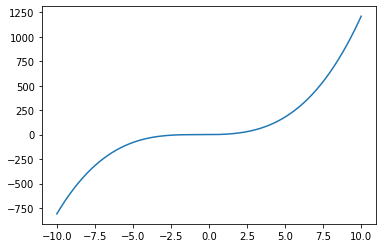

In [3]:
plt.plot(x,y)

In [4]:
data=pd.read_csv('data/Bi.csv', header=None)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,...,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
3,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
